### Configuration 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random

sns.set(style="whitegrid", font_scale=2, rc={'figure.figsize':(7,6.5)}) #Change Figure/Font Size 
plt.rcParams["font.family"] = 'Times New Roman'

# Coloring for blindess
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40-%23c56963-%2329315f-%238ab335
coloring = ['#D81B60', "#1E88E5", "#FFC107", "#004D40", "#C56963", "#29315F", "#8AB335",
            '#FE8250', '#702865', '#EF1C70', '#7BF17C', '#BD80BD', '#5BCDAC']

In [2]:
saveIm = False # Choose to save im 

In [3]:
main_df = pd.read_csv('2021-icml-all.csv')
main_df = main_df.set_index('exp')
main_df.head(5) #Preview

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
1,5/23/20,4:25:16,fib,nam,0.998281,0.000254,0.036135,0.96875,0.895833,0.708333,0.515625,1.001078,1.095501,121.550001,NaN,NaN,nsp_add
2,5/23/20,7:26:23,fib,xlnet,0.297578,0.156668,1.689033,0.00000,0.000000,0.000000,0.000000,1.046246,1092.365684,95.966771,NaN,NaN,nsp_add
3,5/23/20,11:17:20,fib,gru,0.191133,0.192773,0.434366,0.00000,0.000000,0.000000,0.000000,2.279826,2.997453,263.245679,NaN,NaN,NaN
4,5/23/20,12:40:16,fib,lstm,0.169961,0.216383,0.447732,0.00000,0.000000,0.000000,0.000000,2.520672,3.098974,566.426348,NaN,NaN,NaN
5,5/23/20,13:19:19,fib,tf,0.780820,0.034982,1.763515,0.00000,0.000000,0.000000,0.000000,1.031015,124.429347,158.702251,NaN,NaN,nsp_add


In [4]:
def plotTask1Models(title, digit, legend=True):
    plt.plot(x, y_ibert, color=coloring[0], label='I-BERT', marker='o', linewidth=3, linestyle='solid')
    plt.plot(x, y_xlnet, color=coloring[1], label='XLNet', marker='v', linewidth=3,linestyle='solid')
    plt.plot(x, y_lstm, color=coloring[2], label='LSTM', marker ='s', linewidth=3,linestyle='solid')
    plt.plot(x, y_tf, color=coloring[3], label='BERT', marker ='x', linewidth=3, linestyle='solid')
    plt.plot(x, y_dnc, color=coloring[4], label='DNC', marker ='x', linewidth=3, linestyle='solid')
    plt.plot(x, y_ut, color=coloring[5], label='UT', marker ='x', linewidth=3, linestyle='solid')

    if legend: 
        plt.legend()

    plt.xlabel('Validation Digits')
    plt.xticks(np.arange(digit+1, digit+5, 1))
    plt.yticks(np.arange(0, 1.1, step=0.2))
#     plt.title(title)
    plt.show()

In [5]:
def plotTask2Models(title, digit, legend=True):
    plt.plot(x, y_ibert, color=coloring[0], label='I-BERT', marker='o', linewidth=2.5, linestyle='solid')
    plt.plot(x, y_ibertpos, color=coloring[7], label='I-BERT w/ pos', marker='P', linewidth=2.5, linestyle='solid')
    plt.plot(x, y_ibert2, color=coloring[8], label='I-BERT2', marker=7, linewidth=2.5, linestyle='solid')
    plt.plot(x, y_ut, color=coloring[5], label='UT', marker=7, linewidth=2.5, linestyle='solid')
    
    if legend: 
        plt.legend()
        
    plt.xlabel('Validation Digits')
    plt.xticks(np.arange(digit+1, digit+5, 1))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.show()

In [6]:
def get_val(df, net, col):
    return df[df['net']==net][col].to_numpy()[0]

## Fig 4 Number Sequence Prediction

Choose the label among below tasks

- nsp_add
- nsp_copy
- nsp_palin

### Fig 4 (a) Add

In [7]:
df = main_df[main_df['lbl'] == 'nsp_add']
df = df.replace(np.nan, 0)
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
1,5/23/20,4:25:16,fib,nam,0.998281,0.000254,0.036135,0.96875,0.895833,0.708333,0.515625,1.001078,1.095501,121.550001,0.0,0.0,nsp_add
2,5/23/20,7:26:23,fib,xlnet,0.297578,0.156668,1.689033,0.00000,0.000000,0.000000,0.000000,1.046246,1092.365684,95.966771,0.0,0.0,nsp_add
5,5/23/20,13:19:19,fib,tf,0.780820,0.034982,1.763515,0.00000,0.000000,0.000000,0.000000,1.031015,124.429347,158.702251,0.0,0.0,nsp_add
75,0,0,fib,dnc,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,nsp_add
76,0,0,fib,ut,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,nsp_add
77,0,0,fib,lstm,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,nsp_add


In [8]:
# X Range
x = [13, 14, 15, 16]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'nam', 'vacc1'), get_val(df, 'nam', 'vacc2'), get_val(df, 'nam', 'vacc3'), get_val(df, 'nam', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

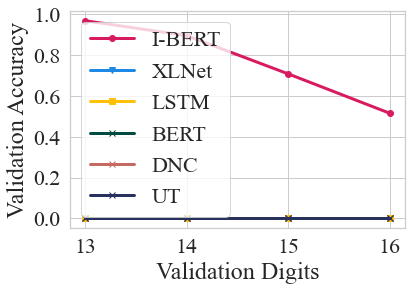

In [9]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Fibonacci test', digit=12, legend=True)
if saveIm: 
    fig1.savefig("img/nsp_add.pdf", format="pdf", bbox_inches='tight')

### Fig 4 (b) Copy

In [10]:
df = main_df[main_df['lbl'] == 'nsp_copy']
df = df.replace(np.nan, 0)
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
11,5/23/20,23:51:25,copy,nam,1.000000,0.000002,0.011037,1.000000,0.994792,0.9375,0.640625,1.000004,1.028355,320.104359,0.0,0.0,nsp_copy
12,5/24/20,0:59:30,copy,xlnet,0.976680,0.001862,3.400338,0.000000,0.000000,0.0000,0.000000,1.000079,10699.514550,188.520329,0.0,0.0,nsp_copy
15,5/24/20,3:53:20,copy,tf,0.995508,0.000513,2.213996,0.000000,0.000000,0.0000,0.000000,1.002108,110.842616,363.696328,0.0,0.0,nsp_copy
78,0,0,copy,dnc,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,nsp_copy
79,1/26/21,0:00:00,copy,ut,1.000000,0.000001,0.009519,0.984375,0.996094,1.0000,0.964844,1.000000,1.000000,824.709604,0.0,0.0,nsp_copy
80,0,0,copy,lstm,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,nsp_copy


In [11]:
# X Range
x = [13, 14, 15, 16]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'nam', 'vacc1'), get_val(df, 'nam', 'vacc2'), get_val(df, 'nam', 'vacc3'), get_val(df, 'nam', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

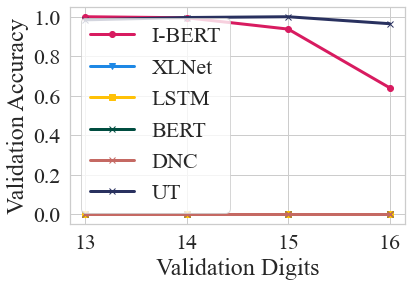

In [12]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Copy test', digit=12, legend=True)
if saveIm: 
    fig1.savefig("img/nsp_copy.pdf", format="pdf", bbox_inches='tight')

### Fig 4 (c) Reverse

In [13]:
df = main_df[main_df['lbl'] == 'nsp_reverse']
df = df.replace(np.nan, 0)
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
16,5/23/20,18:17:06,palin,nam,0.999336,9.020000e-05,0.061019,1.000000,0.989583,0.723958,0.15625,1.000263,1.111505,445.474175,0.0,0.0,nsp_reverse
17,5/23/20,19:05:54,palin,xlnet,0.998047,2.910070e-04,1.056896,0.994792,0.093750,0.000000,0.00000,1.000274,10.484903,261.728869,0.0,0.0,nsp_reverse
20,5/23/20,20:58:11,palin,tf,0.999062,1.953670e-04,2.467904,0.005208,0.000000,0.000000,0.00000,1.000009,105.317515,490.565797,0.0,0.0,nsp_reverse
81,0,0,palin,dnc,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,nsp_reverse
82,1/26/21,0:00:00,palin,ut,1.000000,5.000000e-11,0.000596,0.996094,1.000000,1.000000,1.00000,1.000000,1.000000,825.539949,0.0,0.0,nsp_reverse
83,0,0,palin,lstm,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,nsp_reverse


In [14]:
# X Range
x = [13, 14, 15, 16]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'nam', 'vacc1'), get_val(df, 'nam', 'vacc2'), get_val(df, 'nam', 'vacc3'), get_val(df, 'nam', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

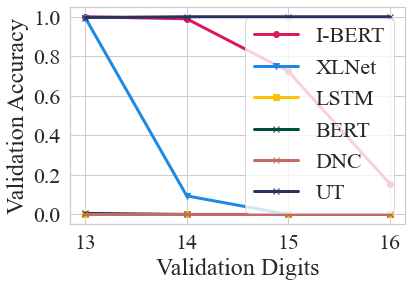

In [15]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Reverse test', digit=12, legend=True)
if saveIm: 
    fig1.savefig("img/nsp_reverse.pdf", format="pdf", bbox_inches='tight')

### New Figure: Ablation study on model size

#### model_size: tiny

In [16]:
df = main_df[main_df['lbl'] == 'abl_tiny']
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
39,1/18/21,7:53:38,fib,tf,0.341562,0.181327,1.177078,0.000000,0.000000,0.000000,0.000000,2.550321,28.757337,6181.124203,NaN,NaN,abl_tiny
40,1/18/21,7:57:17,fib,xlnet,0.168086,0.303038,0.922604,0.000000,0.000000,0.000000,0.000000,3.625258,14.868116,3317.774307,NaN,NaN,abl_tiny
41,1/18/21,8:04:07,fib,ibert,0.938945,0.009210,0.187730,0.710938,0.371094,0.050781,0.007812,1.035520,1.712397,5420.457150,NaN,NaN,abl_tiny
42,1/19/21,1:31:00,fib,lstm,0.100391,0.282053,0.506152,0.000000,0.000000,0.000000,0.000000,3.255390,4.328273,14416.298950,NaN,NaN,abl_tiny
43,1/18/21,8:08:15,fib,dnc,0.239844,0.252589,1.349869,0.000000,0.000000,0.000000,0.000000,2.252602,127.410558,992.567943,NaN,NaN,abl_tiny
44,1/18/21,8:30:29,fib,ut,0.277422,0.215043,0.867159,0.000000,0.000000,0.000000,0.000000,1.878636,14.319067,9030.674997,NaN,NaN,abl_tiny


In [17]:
# X Range
x = [6, 7, 8, 9]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'ibert', 'vacc1'), get_val(df, 'ibert', 'vacc2'), get_val(df, 'ibert', 'vacc3'), get_val(df, 'ibert', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

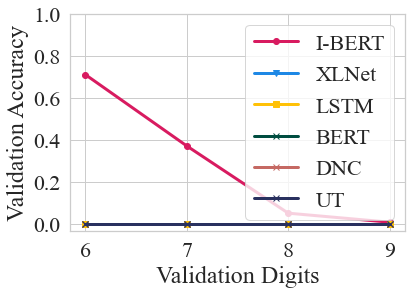

In [18]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Fibonacci test', digit=5, legend=True)
if saveIm: 
    fig1.savefig("img/nsp-tiny.pdf", format="pdf", bbox_inches='tight')

#### model_size: mini

In [19]:
df = main_df[main_df['lbl'] == 'abl_mini']
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
45,1/18/21,8:32:59,fib,tf,0.964727,0.006445,1.268856,0.007812,0.000000,0.000000,0.000000,1.051396,39.272543,2377.610259,NaN,NaN,abl_mini
46,1/18/21,8:42:20,fib,xlnet,0.383047,0.188581,1.140935,0.000000,0.000000,0.000000,0.000000,1.051423,1075.073292,1221.816394,NaN,NaN,abl_mini
47,1/24/21,6:47:12,fib,ibert,0.987773,0.002331,0.241840,0.687500,0.378906,0.097656,0.007812,1.009534,2.022167,773.802570,NaN,NaN,abl_mini
48,1/19/21,1:32:37,fib,lstm,0.524453,0.114103,0.611127,0.011719,0.000000,0.000000,0.000000,1.623672,5.955220,5698.338264,NaN,NaN,abl_mini
49,1/18/21,9:10:49,fib,dnc,0.194922,0.250490,1.129881,0.000000,0.000000,0.000000,0.000000,1.542941,114.724938,879.880669,NaN,NaN,abl_mini
50,1/18/21,9:36:07,fib,ut,0.859414,0.024830,0.679143,0.128906,0.011719,0.003906,0.000000,1.003768,11.477103,1854.518633,NaN,NaN,abl_mini


In [20]:
# X Range
x = [6, 7, 8, 9]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'ibert', 'vacc1'), get_val(df, 'ibert', 'vacc2'), get_val(df, 'ibert', 'vacc3'), get_val(df, 'ibert', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

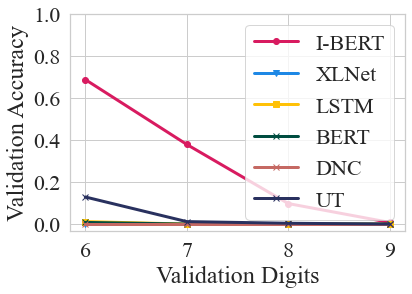

In [21]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Fibonacci test', digit=5, legend=True)
if saveIm: 
    fig1.savefig("img/nsp_mini.pdf", format="pdf", bbox_inches='tight')

#### model_size: small

In [22]:
df = main_df[main_df['lbl'] == 'abl_small']
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
63,1/22/21,15:17:05,fib,tf,0.938281,0.011180,1.659466,0.000000,0.000000,0.000000,0.000000,1.048480,125.656358,1339.367605,NaN,NaN,abl_small
64,1/22/21,15:33:39,fib,xlnet,0.951953,0.008858,2.039876,0.000000,0.000000,0.000000,0.000000,1.018526,1046.423411,697.388596,NaN,NaN,abl_small
65,1/22/21,16:05:42,fib,ibert,0.994414,0.001130,0.344577,0.582031,0.117188,0.015625,0.003906,1.004637,2.720933,1198.795111,NaN,NaN,abl_small
66,1/22/21,16:24:14,fib,lstm,0.750703,0.051289,0.421990,0.328125,0.062500,0.000000,0.003906,1.356395,3.333312,2625.395450,NaN,NaN,abl_small
67,1/22/21,16:32:44,fib,dnc,0.526797,0.106166,1.789185,0.000000,0.000000,0.000000,0.000000,1.161344,11780.203670,723.432208,NaN,NaN,abl_small
68,1/22/21,17:03:13,fib,ut,0.990742,0.001549,0.548458,0.195312,0.027344,0.000000,0.000000,1.002963,4.920139,1378.597546,NaN,NaN,abl_small


In [23]:
# X Range
x = [6, 7, 8, 9]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'ibert', 'vacc1'), get_val(df, 'ibert', 'vacc2'), get_val(df, 'ibert', 'vacc3'), get_val(df, 'ibert', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

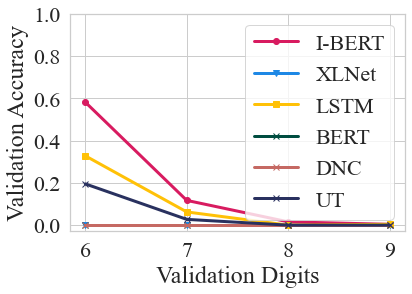

In [24]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Fibonacci test', digit=5, legend=True)
if saveIm: 
    fig1.savefig("img/nsp_small.pdf", format="pdf", bbox_inches='tight')

#### model_size: medium

In [25]:
df = main_df[main_df['lbl'] == 'abl_medium']
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
51,1/18/21,9:47:55,fib,tf,0.976172,0.005212,1.603555,0.000000,0.000000,0.000000,0.0,1.013008,146.254048,685.879620,NaN,NaN,abl_medium
52,1/18/21,10:20:16,fib,xlnet,0.990117,0.001998,2.154792,0.000000,0.000000,0.000000,0.0,1.003595,1205.124019,345.260901,NaN,NaN,abl_medium
53,1/18/21,11:24:48,fib,ibert,0.994492,0.001148,0.432968,0.398438,0.109375,0.000000,0.0,1.004705,3.543713,645.764906,NaN,NaN,abl_medium
54,1/19/21,1:36:34,fib,lstm,0.594766,0.091511,0.393216,0.015625,0.000000,0.000000,0.0,1.438683,3.046379,1442.049852,NaN,NaN,abl_medium
55,1/18/21,11:59:10,fib,dnc,0.266094,0.205446,1.356057,0.000000,0.000000,0.000000,0.0,1.436633,114.546230,526.394991,NaN,NaN,abl_medium
56,1/18/21,12:41:06,fib,ut,0.994297,0.000899,0.762661,0.562500,0.113281,0.003906,0.0,1.010263,10.725082,713.838575,NaN,NaN,abl_medium


In [26]:
# X Range
x = [6, 7, 8, 9]

# Y model results
y_tf = [get_val(df, 'tf', 'vacc1'), get_val(df, 'tf', 'vacc2'), get_val(df, 'tf', 'vacc3'), get_val(df, 'tf', 'vacc4')]
y_xlnet = [get_val(df, 'xlnet', 'vacc1'), get_val(df, 'xlnet', 'vacc2'), get_val(df, 'xlnet', 'vacc3'), get_val(df, 'xlnet', 'vacc4')]
y_ibert = [get_val(df, 'ibert', 'vacc1'), get_val(df, 'ibert', 'vacc2'), get_val(df, 'ibert', 'vacc3'), get_val(df, 'ibert', 'vacc4')]
y_lstm = [get_val(df, 'lstm', 'vacc1'), get_val(df, 'lstm', 'vacc2'), get_val(df, 'lstm', 'vacc3'), get_val(df, 'lstm', 'vacc4')]
y_dnc = [get_val(df, 'dnc', 'vacc1'), get_val(df, 'dnc', 'vacc2'), get_val(df, 'dnc', 'vacc3'), get_val(df, 'dnc', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

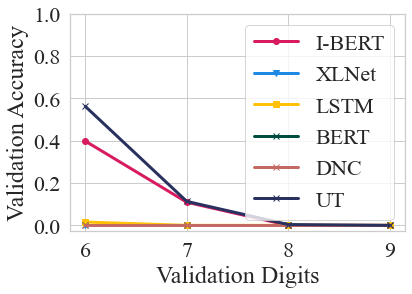

In [27]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Fibonacci test', digit=5, legend=True)
if saveIm: 
    fig1.savefig("img/nsp_medium.pdf", format="pdf", bbox_inches='tight')

## Figure 5: Ablation Study

### fig5 (a) 5 digit

In [28]:
df = main_df[main_df['lbl'] == 'abl_5digits']
df = df.replace(np.nan, 0)
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
21,5/22/20,6:36:13,fib,nam,0.996563,0.000811,0.349967,0.619792,0.223958,0.052083,0.005208,1.003323,2.780783,567.180939,0.0,0.0,abl_5digits
22,5/22/20,7:14:47,fib,nampos,0.993398,0.001341,1.082623,0.020833,0.005208,0.000000,0.000000,1.007897,21.920712,566.386090,0.0,0.0,abl_5digits
23,5/22/20,7:53:25,fib,vikram,0.993555,0.001579,0.344806,0.526042,0.369792,0.104167,0.020833,1.006263,2.720774,376.389907,0.0,0.0,abl_5digits
84,0,0,fib5,ut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,abl_5digits


In [29]:
# X Range
x = [6, 7, 8, 9]

# Y model results
y_ibert = [get_val(df, 'nam', 'vacc1'), get_val(df, 'nam', 'vacc2'), get_val(df, 'nam', 'vacc3'), get_val(df, 'nam', 'vacc4')]
y_ibertpos = [get_val(df, 'nampos', 'vacc1'), get_val(df, 'nampos', 'vacc2'), get_val(df, 'nampos', 'vacc3'), get_val(df, 'nampos', 'vacc4')]
y_ibert2 = [get_val(df, 'vikram', 'vacc1'), get_val(df, 'vikram', 'vacc2'), get_val(df, 'vikram', 'vacc3'), get_val(df, 'vikram', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

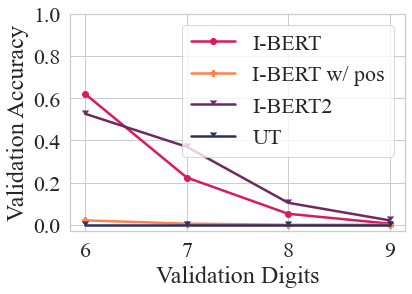

In [30]:
fig2_1, ax2_1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask2Models('Fibonacci test (5 digit)', digit=5, legend=True)
if saveIm:
    fig2_1.savefig("img/task2-5digit.pdf", format="pdf", bbox_inches='tight')

### Figure 5 (b) 12digits

In [31]:
df = main_df[main_df['lbl'] == 'abl_12digits']
df = df.append(main_df.loc[1])
df

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc,lbl
exp,,,,,,,,,,,,,,,,,
37,5/24/20,7:10:48,fib,nampos,0.975469,0.002627,0.609848,0.203125,0.125000,0.031250,0.010417,1.010911,4.668283,338.734910,NaN,NaN,abl_12digits
38,5/24/20,8:16:08,fib,vikram,0.998945,0.000122,0.333990,0.723958,0.291667,0.031250,0.000000,1.000507,2.324566,218.835771,NaN,NaN,abl_12digits
86,1/26/21,0:00:00,fib12,ut,0.996055,0.000390,0.124250,0.886719,0.734375,0.625000,0.488281,1.001649,1.368401,567.803953,NaN,NaN,abl_12digits
1,5/23/20,4:25:16,fib,nam,0.998281,0.000254,0.036135,0.968750,0.895833,0.708333,0.515625,1.001078,1.095501,121.550001,NaN,NaN,nsp_add


In [32]:
# X Range
x = [6, 7, 8, 9]

# Y model results
y_ibert = [get_val(df, 'nam', 'vacc1'), get_val(df, 'nam', 'vacc2'), get_val(df, 'nam', 'vacc3'), get_val(df, 'nam', 'vacc4')]
y_ibertpos = [get_val(df, 'nampos', 'vacc1'), get_val(df, 'nampos', 'vacc2'), get_val(df, 'nampos', 'vacc3'), get_val(df, 'nampos', 'vacc4')]
y_ibert2 = [get_val(df, 'vikram', 'vacc1'), get_val(df, 'vikram', 'vacc2'), get_val(df, 'vikram', 'vacc3'), get_val(df, 'vikram', 'vacc4')]
y_ut = [get_val(df, 'ut', 'vacc1'), get_val(df, 'ut', 'vacc2'), get_val(df, 'ut', 'vacc3'), get_val(df, 'ut', 'vacc4')]

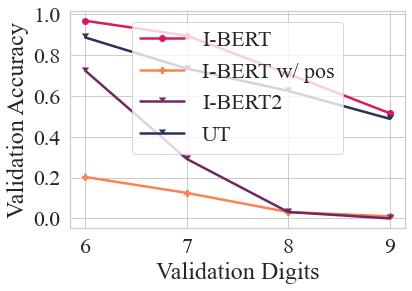

In [33]:
fig2_1, ax2_1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask2Models('Fibonacci test (12 digit)', digit=5, legend=True)
if saveIm:
    fig2_1.savefig("img/task2-12digit.pdf", format="pdf", bbox_inches='tight')